# <center> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы. Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

А также ответить на ключевые вопросы HR-агентства:

- Вопрос 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Вопрос 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Вопрос 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Вопрос 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе. Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:
- тесты для количественных признаков:
    - для одной выборки
    - для двух выборок
    - для нескольких выборок
- тест для категориальных признаков.

Датасет можно скачать по ссылке https://drive.google.com/file/d/1i_xiPNcztQ1Lwaw1h8BU0slzRyV-t81T/view?usp=sharing

Оригинальный датасет: “Data Science Job Salaries” (kaggle.com) по ссылке https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

## Загрузка данных

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.contingency_tables import mcnemar

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загруджаем датасет
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# Задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ и очистка данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
data.describe().round()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.0,607.0,607.0,607.0,607.0
mean,303.0,2021.0,324000.0,112298.0,71.0
std,175.0,1.0,1544357.0,70957.0,41.0
min,0.0,2020.0,4000.0,2859.0,0.0
25%,152.0,2021.0,70000.0,62726.0,50.0
50%,303.0,2022.0,115000.0,101570.0,100.0
75%,454.0,2022.0,165000.0,150000.0,100.0
max,606.0,2022.0,30400000.0,600000.0,100.0


In [6]:
data['employment_type'].value_counts() # изучая признаки, обнаруживаем, что признак 'employment_type' неинформативен

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [7]:
data = data.drop(['Unnamed: 0', 'employment_type'], axis=1) # удаляем лишние признаки

In [8]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 10)


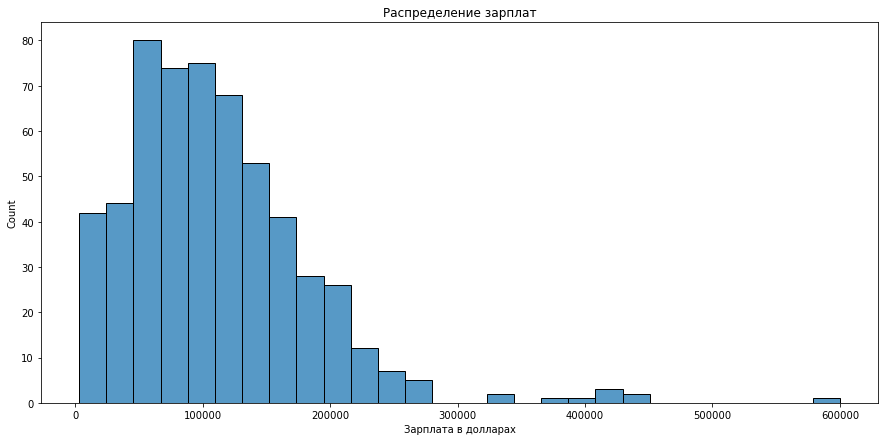

In [9]:
# Изучаем распределение зарплат по графику
fig = plt.figure(figsize=(15, 7))
ax = sns.histplot(data=data,
                 x='salary_in_usd')
ax.set(xlabel='Зарплата в долларах')
plt.title('Распределение зарплат')

plt.show()

По графику видно, что распредление зарплат околонормальное.

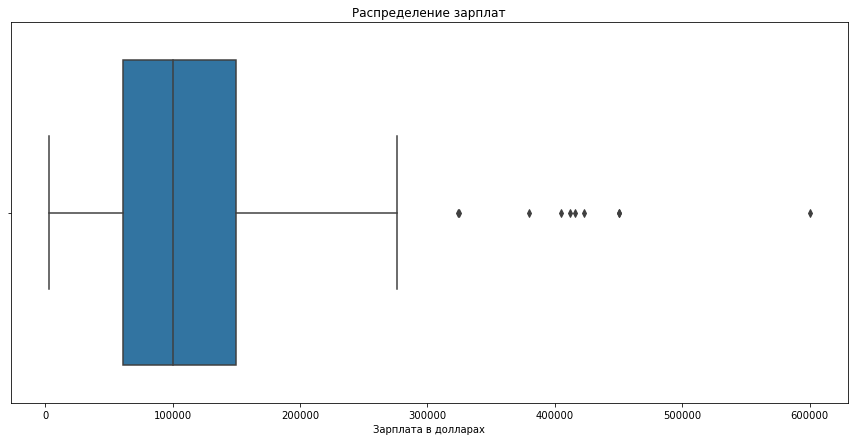

In [10]:
# Изучаем распределение зарплат по графику
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data,
           x='salary_in_usd')
ax.set(xlabel='Зарплата в долларах')
plt.title('Распределение зарплат')

plt.show()

Вывод: по графику видно, что зарплаты выше 300 000 долларов встречаются единично, поэтому посчитаем их за выбросы и удалим для чистоты экспериментов, аналогично поступим с зарплатами ниже 5 000 долларов.

In [11]:
outliers = data[(data['salary_in_usd']>300000) | (data['salary_in_usd']<5000)]
data = data.drop(outliers.index, axis=0)

## Выясняем, какие факторы влияют на зарплату специалиста Data Scientist.

Рассмотрим по порядку все признаки, которые в большей или меньшей степени влияют на зарплаты, кроме тех, что будут рассмотрены ниже в связи с ответами на поставленные в задании вопросы.

In [12]:
# Первый признак - опыт работы
data.groupby('experience_level')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,87.0,62306.0,44213.0,5707.0,28504.0,58000.0,85852.0,250000.0
EX,22.0,159963.0,57624.0,69741.0,121140.0,151834.0,212000.0,250000.0
MI,203.0,83404.0,47623.0,5409.0,47641.0,76940.0,110888.0,270000.0
SE,240.0,135117.0,52671.0,18907.0,99282.0,135000.0,170000.0,276000.0


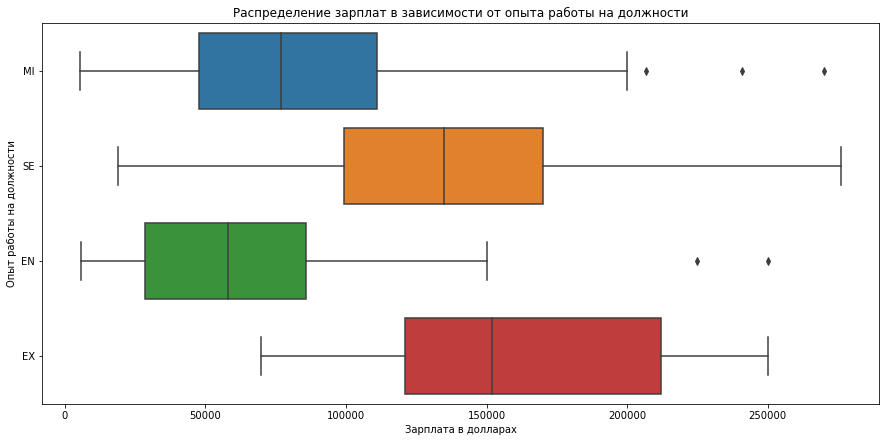

In [13]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data,
           x='salary_in_usd',
           y='experience_level')
ax.set(xlabel='Зарплата в долларах', ylabel='Опыт работы на должности')
plt.title('Распределение зарплат в зависимости от опыта работы на должности')

plt.show()

По графику видно, что медианная зарплата выше всего с опытом работы Executive-level/Director, затем следует Senior-level/Expert, затем Mid-level/Intermediate, затем Entry-level/Junior. Это логично, с увеличением опыта работы - растёт и зарплата. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- H0: Зарплаты вне зависимости от опыта работы на должности равны
- H1: Зарплаты в зависимости от опыта работы на должности не равны

In [14]:
data_en = data[data['experience_level']=='EN']['salary_in_usd']
data_mi = data[data['experience_level']=='MI']['salary_in_usd']
data_se = data[data['experience_level']=='SE']['salary_in_usd']
data_ex = data[data['experience_level']=='EX']['salary_in_usd']

# Проводим тест Шапиро-Уилка на нормальность распределения
_, p1 = stats.shapiro(data_en)
_, p2 = stats.shapiro(data_mi)
_, p3 = stats.shapiro(data_se)
_, p4 = stats.shapiro(data_ex)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))
print('p-value 3 = %.3f' % (p3))
print('p-value 4 = %.3f' % (p4))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha or p3 <= alpha or p4 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.000
p-value 2 = 0.000
p-value 3 = 0.352
p-value 4 = 0.228
Распределение не нормально


In [15]:
# Выбираем тест Краскела - Уоллиса, поскольку у нас 4 независимые группы, которые не распределены по нормальному закону
_, p = stats.kruskal(data_en, data_mi, data_se, data_ex)

print('p-value = %.3f' % (p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас есть основания утверждать, что зарплаты в зависимости от опыта работы на должности не равны. Соответственно, различия в опыте работы на должности являются статистически значимыми, а опыт работы на должности влияет на зарплату.

In [16]:
# Следующий признак - валюта
data_currency = data.copy()
data_currency['salary_currency'] = data_currency['salary_currency'].apply(lambda x: x if x in ['USD', 'EUR', 'GBP', 'INR', 'CAD'] else 'other')

In [17]:
data_currency.groupby('salary_currency')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
CAD,18.0,97223.0,40725.0,52396.0,71130.0,83264.0,113751.0,196979.0
EUR,93.0,65599.0,31292.0,10354.0,46759.0,62649.0,79197.0,173762.0
GBP,43.0,81744.0,30084.0,37300.0,57575.0,78526.0,103931.0,183228.0
INR,27.0,27766.0,22836.0,5409.0,12847.0,21637.0,32712.0,94665.0
USD,347.0,129662.0,56116.0,8000.0,92000.0,128875.0,165000.0,276000.0
other,24.0,49624.0,31331.0,12103.0,28576.0,38637.0,67124.0,122346.0


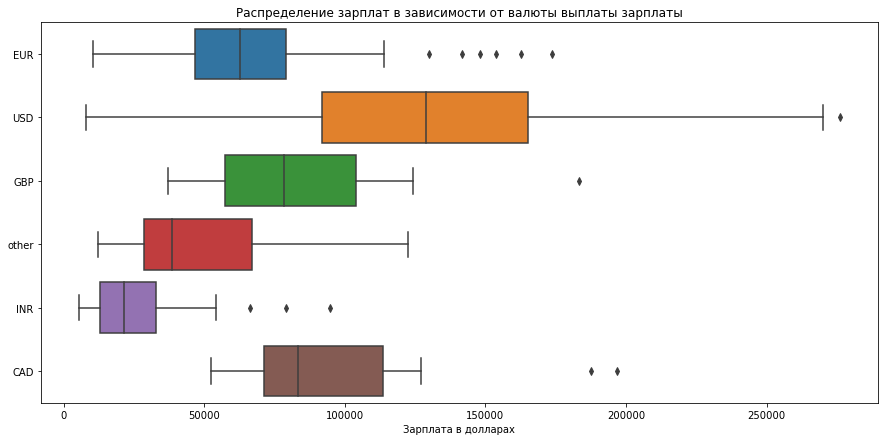

In [18]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data_currency,
           x='salary_in_usd',
           y='salary_currency')
ax.set(xlabel='Зарплата в долларах', ylabel='')
plt.title('Распределение зарплат в зависимости от валюты выплаты зарплаты')

plt.show()

По графику видно, что зарплата, выплачиваемая в такой валюте как доллар, выше зарплат, выплачиваемых в остальных валютах. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- H0: Зарплата, выплачиваемая в такой валюте как доллар, ниже или равна зарплатам, выплачиваемым в остальных валютах
- H1: Зарплата, выплачиваемая в такой валюте как доллар, выше зарплат, выплачиваемых в остальных валютах

In [19]:
data_usd = data[data['salary_currency']=='USD']['salary_in_usd']
data_other = data[data['salary_currency']!='USD']['salary_in_usd']

# Проводим тест Шапиро-Уилка на нормальность распределения
_, p1 = stats.shapiro(data_usd)
_, p2 = stats.shapiro(data_other)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.074
p-value 2 = 0.000
Распределение не нормально


In [20]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_usd, data_other, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас есть основания утверждать, что зарплата, выплачиваемая в такой валюте как доллар, выше зарплат, выплачиваемых в остальных валютах. Соответственно, различия в валюте выплаты зарплаты являются статистически значимыми, а валюта выплаты зарплаты влияет на зарплату.

In [21]:
# Ещё один признак - страна проживания специалиста
data_employee_residence = data.copy()
data_employee_residence['employee_residence'] = data_employee_residence['employee_residence'].apply(lambda x: x if x=='US' else 'other')

In [22]:
data_employee_residence.groupby('employee_residence')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
US,285.0,140677.0,48883.0,25000.0,105000.0,136000.0,170000.0,276000.0
other,267.0,68187.0,43059.0,5409.0,39263.0,62651.0,88293.0,260000.0


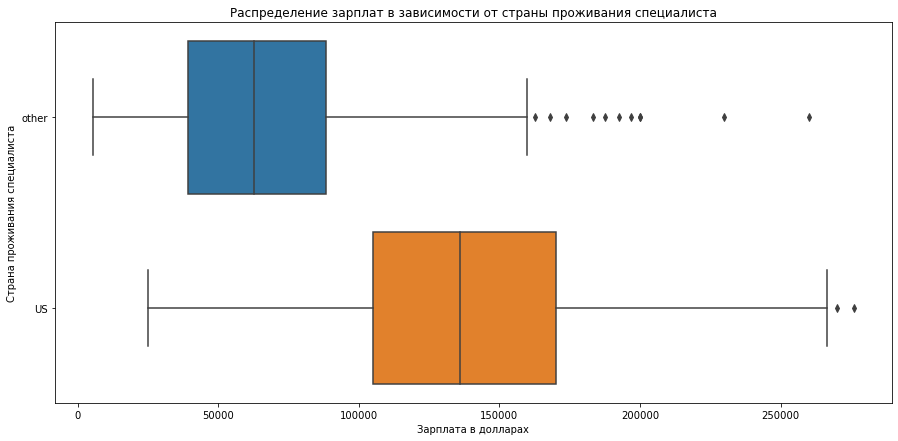

In [23]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data_employee_residence,
           x='salary_in_usd',
           y='employee_residence')
ax.set(xlabel='Зарплата в долларах', ylabel='Страна проживания специалиста')
plt.title('Распределение зарплат в зависимости от страны проживания специалиста')

plt.show()

По графику видно, что зарплата, выплачиваемая специалисту, который живёт в США, выше зарплат, выплачиваемым специалистам, проживающим в других странах. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- H0: Зарплата, выплачиваемая специалисту, который живёт в США, ниже или равна зарплатам, выплачиваемым специалистам, проживающим в других странах
- H1: Зарплата, выплачиваемая специалисту, который живёт в США, выше зарплат, выплачиваемых специалистам, проживающим в других странах

In [24]:
data_us = data[data['employee_residence']=='US']['salary_in_usd']
data_other = data[data['employee_residence']!='US']['salary_in_usd']

# Проводим тест Шапиро-Уилка на нормальность распределения
_, p1 = stats.shapiro(data_us)
_, p2 = stats.shapiro(data_other)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.003
p-value 2 = 0.000
Распределение не нормально


In [25]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_us, data_other, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас есть основания утверждать, что зарплата, выплачиваемая специалисту, который живёт в США, выше зарплат, выплачиваемых специалистам, проживающим в других странах. Соответственно, различия в стране проживания специалиста являются статистически значимыми, а страна проживания специалиста влияет на зарплату.

In [26]:
# Ещё один признак - общий объём работы, выполняемой удалённо
data.groupby('remote_ratio')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,118.0,104603.0,60036.0,5882.0,64137.0,98579.0,135750.0,276000.0
50,97.0,77193.0,46086.0,5409.0,49646.0,66022.0,99703.0,250000.0
100,337.0,114149.0,58949.0,5679.0,69741.0,110000.0,155000.0,270000.0


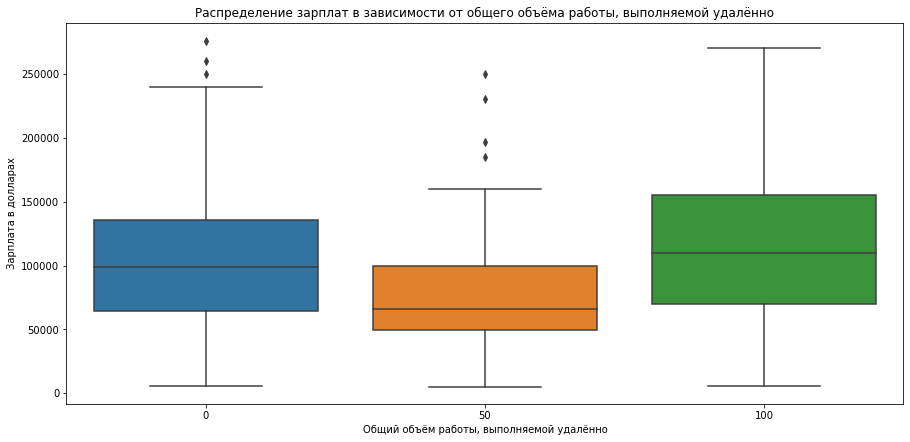

In [27]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data,
           x='remote_ratio',
           y='salary_in_usd')
ax.set(xlabel='Общий объём работы, выполняемой удалённо', ylabel='Зарплата в долларах')
plt.title('Распределение зарплат в зависимости от общего объёма работы, выполняемой удалённо')

plt.show()

По графику видно, что зарплаты, выплачиваемые специалистам с разными объёмами работы, выполняемой удалённо, не равны. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- H0: Зарплаты, выплачиваемые специалистам с разными объёмами работы, выполняемой удалённо, равны
- H1: Зарплаты, выплачиваемые специалистам с разными объёмами работы, выполняемой удалённо, не равны

In [28]:
data_0 = data[data['remote_ratio']==0]['salary_in_usd']
data_50 = data[data['remote_ratio']==50]['salary_in_usd']
data_100 = data[data['remote_ratio']==100]['salary_in_usd']

# Проводим тест Шапиро-Уилка на нормальность распределения
_, p1 = stats.shapiro(data_0)
_, p2 = stats.shapiro(data_50)
_, p3 = stats.shapiro(data_100)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))
print('p-value 3 = %.3f' % (p3))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha or p3 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.005
p-value 2 = 0.000
p-value 3 = 0.001
Распределение не нормально


In [29]:
# Выбираем тест Краскела - Уоллиса, поскольку у нас 3 независимые группы, которые не распределены по нормальному закону
_, p = stats.kruskal(data_0, data_50, data_100)

print('p-value = %.3f' % (p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас есть основания утверждать, что зарплаты, выплачиваемые специалистам с разными объёмами работы, выполняемой удалённо, не равны. Соответственно, различия в разных объёмах работы, выполняемой удалённо, являются статистически значимыми, а объём удалённой работы специалиста влияет на зарплату.

In [30]:
# Ещё один признак - страна главного офиса работодателя или филиала
data_company_location = data.copy()
data_company_location['company_location'] = data_company_location['company_location'].apply(lambda x: x if x=='US' else 'other')

In [31]:
data_company_location.groupby('company_location')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
US,308.0,135390.0,52206.0,5679.0,100000.0,133660.0,167219.0,276000.0
other,244.0,68028.0,42635.0,5409.0,39753.0,62726.0,87932.0,260000.0


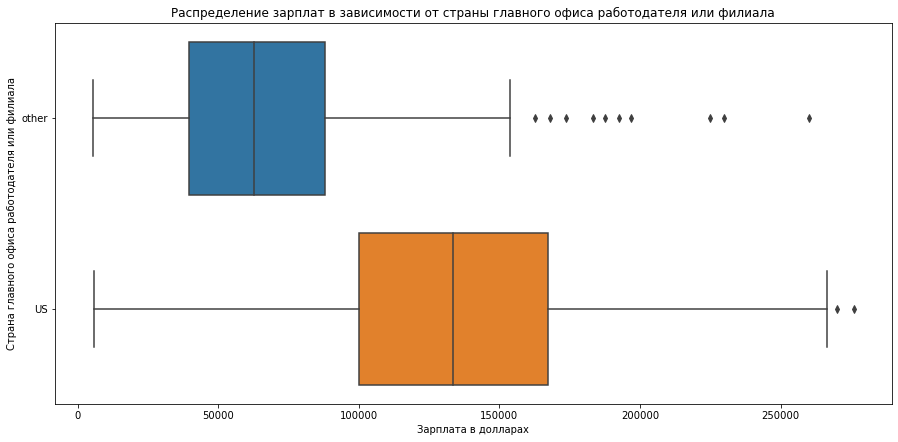

In [32]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data_company_location,
           x='salary_in_usd',
           y='company_location')
ax.set(xlabel='Зарплата в долларах', ylabel='Страна главного офиса работодателя или филиала')
plt.title('Распределение зарплат в зависимости от страны главного офиса работодателя или филиала')

plt.show()

По графику видно, что зарплата специалиста, который работает в стране главного офиса работодателя или филиала США выше зарплаты специалиста, который работает в остальных странах главного офиса работодателя или филиала. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- H0: Зарплата специалиста, который работает в стране главного офиса работодателя или филиала США ниже или равна зарплате специалиста, который работает в остальных странах главного офиса работодателя или филиала
- H1: Зарплата специалиста, который работает в стране главного офиса работодателя или филиала США выше зарплаты специалиста, который работает в остальных странах главного офиса работодателя или филиала

In [33]:
data_us = data[data['company_location']=='US']['salary_in_usd']
data_other = data[data['company_location']!='US']['salary_in_usd']


# Проводим тест Шапиро-Уилка на нормальность распределения
_, p1 = stats.shapiro(data_us)
_, p2 = stats.shapiro(data_other)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.205
p-value 2 = 0.000
Распределение не нормально


In [34]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_us, data_other, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас есть основания утверждать, что зарплата специалиста, который работает в стране главного офиса работодателя или филиала США выше зарплаты специалиста, который работает в остальных странах главного офиса работодателя или филиала. Соответственно, различия в стране главного офиса работодателя или филиала являются статистически значимыми, а страна главного офиса работодателя или филиала специалиста влияет на зарплату.

## Вопрос 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

In [35]:
# Сперва рассмотрим всех специалистов
data.groupby('work_year')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,69.0,82776.0,53887.0,5707.0,45618.0,72000.0,112872.0,260000.0
2021,208.0,93643.0,60877.0,5409.0,50000.0,82514.0,130006.0,276000.0
2022,275.0,120399.0,54226.0,10000.0,78658.0,118187.0,158600.0,266400.0


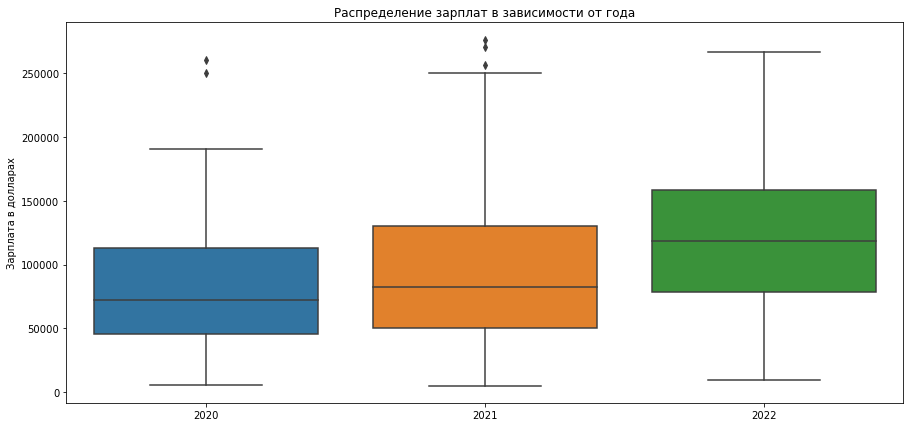

In [36]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data,
                x='work_year',
                y='salary_in_usd')
ax.set(xlabel='', ylabel='Зарплата в долларах')
plt.title('Распределение зарплат в зависимости от года')

plt.show()

По графику видно, что медианная зарплата у всех специалистов с каждым годом растёт. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

In [37]:
data_2020 = data[data['work_year']==2020]['salary_in_usd']
data_2021 = data[data['work_year']==2021]['salary_in_usd']
data_2022 = data[data['work_year']==2022]['salary_in_usd']

# Проводим тест Шапиро — Уилка на нормальность распределения
_, p1 = stats.shapiro(data_2020)
_, p2 = stats.shapiro(data_2021)
_, p3 = stats.shapiro(data_2022)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))
print('p-value 3 = %.3f' % (p3))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha or p3 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.000
p-value 2 = 0.000
p-value 3 = 0.008
Распределение не нормально


- HO: Зарплата у всех специалистов в 2021 году ниже или равна зарплатам всех специалистов в 2020 году
- H1: Зарплата у всех специалистов в 2021 году выше зарплат всех специалистов в 2020 году

In [38]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_2020, data_2021, alternative='less')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.115
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


- HO: Зарплата у всех специалистов в 2022 году ниже или равна зарплатам всех специалистов в 2021 году
- H1: Зарплата у всех специалистов в 2022 году выше зарплат всех специалистов в 2021 году

In [39]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_2021, data_2022, alternative='less')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что наблюдается ежегодный рост зарплат у всех специалистов, поскольку рост зарплат в 2021 году по сравнению с 2020 году оказался статистически незначимым. Но рост зарплат у всех специалистов в 2022 году по сравнению с 2021 году статистически значим.

In [40]:
# Теперь рассмотрим исключительно специалистов Data Scientist
data[data['job_title']=='Data Scientist'].groupby('work_year')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,20.0,69669.0,33268.0,21669.0,41768.0,62726.0,94678.0,138350.0
2021,42.0,73396.0,44455.0,5679.0,36938.0,74387.0,102768.0,165000.0
2022,65.0,131367.0,55785.0,18442.0,95550.0,135000.0,170000.0,260000.0


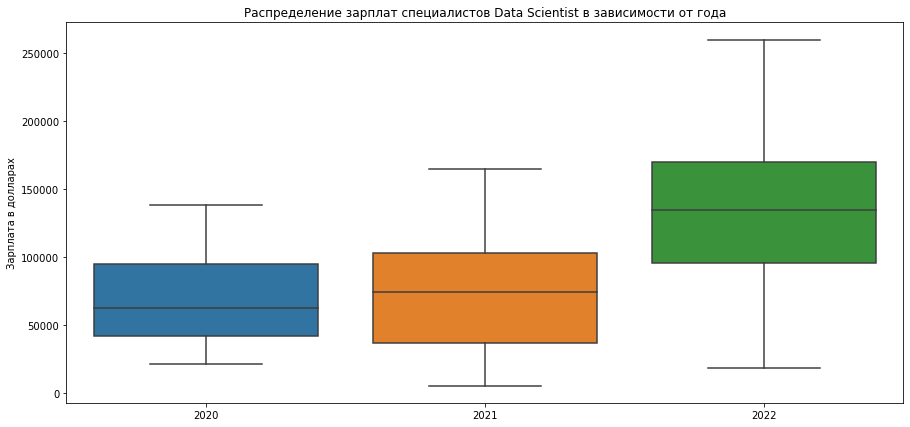

In [41]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data[data['job_title']=='Data Scientist'],
                x='work_year',
                y='salary_in_usd')
ax.set(xlabel='', ylabel='Зарплата в долларах')
plt.title('Распределение зарплат специалистов Data Scientist в зависимости от года')

plt.show()

По графику видно, что медианная зарплата у специалистов Data Scientist с каждым годом растёт. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

In [42]:
data_ds2020 = data[(data['job_title']=='Data Scientist') & (data['work_year']==2020)]['salary_in_usd']
data_ds2021 = data[(data['job_title']=='Data Scientist') & (data['work_year']==2021)]['salary_in_usd']
data_ds2022 = data[(data['job_title']=='Data Scientist') & (data['work_year']==2022)]['salary_in_usd']

# Проводим тест Шапиро — Уилка на нормальность распределения
_, p1 = stats.shapiro(data_ds2020)
_, p2 = stats.shapiro(data_ds2021)
_, p3 = stats.shapiro(data_ds2022)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))
print('p-value 3 = %.3f' % (p3))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha or p3 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.145
p-value 2 = 0.150
p-value 3 = 0.676
Распределение нормально


- HO: Зарплата у специалистов Data Scientist в 2021 году ниже или равна зарплатам всех специалистов в 2020 году
- H1: Зарплата у специалистов Data Scientist в 2021 году выше зарплат всех специалистов в 2020 году

In [43]:
# Проводим тест Левена на равенство дисперсий
result = stats.levene(data_ds2020, data_ds2021)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# Проводим тест на сравнение средних в группах (двухвыборочный Т-критерий)
_, p = stats.ttest_ind(data_ds2020, data_ds2021, alternative='less', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.094
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.
p-value = 0.370
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


- HO: Зарплата у специалистов Data Scientist в 2022 году ниже или равна зарплатам всех специалистов в 2021 году
- H1: Зарплата у специалистов Data Scientist в 2022 году выше зарплат всех специалистов в 2021 году

In [44]:
# Проводим тест Левена на равенство дисперсий
result = stats.levene(data_ds2021, data_ds2022)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# Проводим тест на сравнение средних в группах (двухвыборочный Т-критерий)
_, p = stats.ttest_ind(data_ds2021, data_ds2022, alternative='less', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.176
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: получаем результат, аналогичный всем специальностям: у нас нет оснований утверждать, что наблюдается ежегодный рост зарплат у специалистов Data Scientist, поскольку рост зарплат в 2021 году по сравнению с 2020 году оказался статистически незначимым. Но рост зарплат у специалистов Data Scientist в 2022 году по сравнению с 2021 году статистически значим.

## Вопрос 2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

In [45]:
data_ds_de = data[(data['job_title']=='Data Scientist') | (data['job_title']=='Data Engineer')]
data_ds_de2022 = data_ds_de[data_ds_de['work_year']==2022]

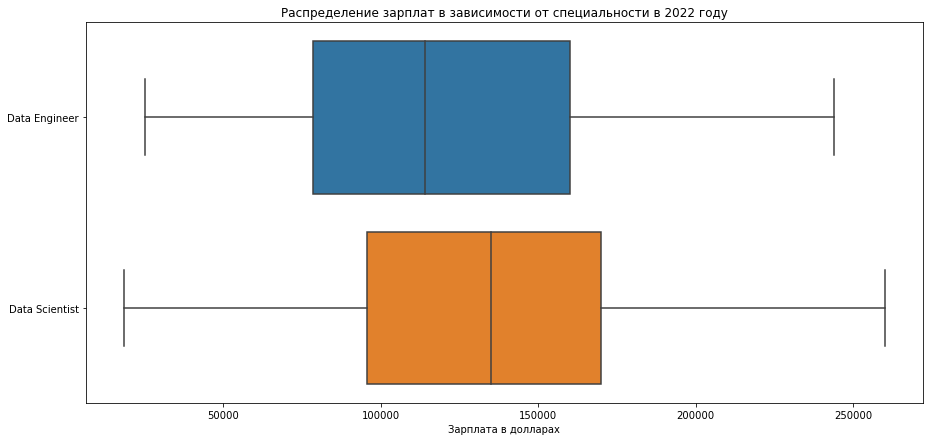

In [46]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data_ds_de2022,
                x='salary_in_usd',
                y='job_title')
ax.set(xlabel='Зарплата в долларах', ylabel='')
plt.title('Распределение зарплат в зависимости от специальности в 2022 году')

plt.show()

По графику видно, медианная зарплата Data Scientist выше зарплаты Data Engineer в 2022 году. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- HO: зарплаты Data Scientist меньше либо равны зарплатам Data Engineer в 2022 году
- H1: зарплаты Data Scientist выше зарплат Data Engineer в 2022 году

In [47]:
data_ds2022 = data[(data['job_title']=='Data Scientist') & (data['work_year']==2022)]['salary_in_usd']
data_de2022 = data[(data['job_title']=='Data Engineer') & (data['work_year']==2022)]['salary_in_usd']

# Проводим тест Шапиро — Уилка на нормальность распределения
_, p1 = stats.shapiro(data_ds2022)
_, p2 = stats.shapiro(data_de2022)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.676
p-value 2 = 0.021
Распределение не нормально


In [48]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_ds2022, data_de2022, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.128
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что зарплаты Data Scientist и Data Engineer в 2022 году не равны, поскольку результаты теста оказались статистически незначимыми.

## Вопрос 3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

In [49]:
# Сперва рассмотрим всех специалистов
data.groupby('company_size')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,186.0,106561.0,61724.0,5882.0,58467.0,95389.0,150000.0,276000.0
M,286.0,113679.0,55774.0,5409.0,71835.0,109640.0,150056.0,266400.0
S,80.0,74583.0,51439.0,5679.0,42070.0,65511.0,100000.0,260000.0


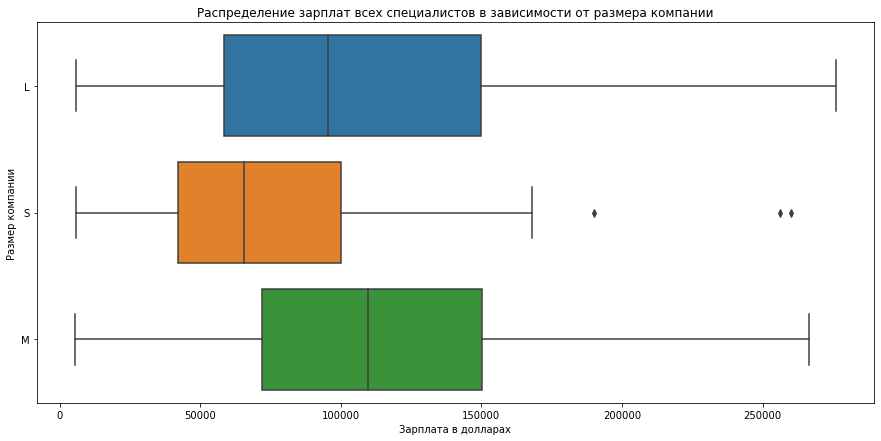

In [50]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data,
                x='salary_in_usd',
                y='company_size')
ax.set(xlabel='Зарплата в долларах', ylabel='Размер компании')
plt.title('Распределение зарплат всех специалистов в зависимости от размера компании')

plt.show()

По графику видно, что самая высокая медианная зарплата в средних компаниях, на втором месте крупные компании, на третьем - небольшие. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- H0: Зарплаты всех специалистов в средних компаниях ниже или равны зарплатам в небольших
- H1: Зарплаты всех специалистов в средних компаниях выше, чем в небольших

In [51]:
# Осуществляем перевод категориального признака 'company_size' в количественный для проведения дальнейших тестов
data_csize = data.copy()
data_csize['company_size'] = data_csize['company_size'].replace(['S', 'M', 'L'], [1, 2, 3])

In [52]:
data_dss = data_csize[data_csize['company_size']==1]['salary_in_usd']
data_dsm = data_csize[data_csize['company_size']==2]['salary_in_usd']
data_dsl = data_csize[data_csize['company_size']==3]['salary_in_usd']

# Проводим тест Шапиро — Уилка на нормальность распределения
_, p1 = stats.shapiro(data_dss)
_, p2 = stats.shapiro(data_dsm)
_, p3 = stats.shapiro(data_dsl)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))
print('p-value 3 = %.3f' % (p3))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha or p3 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.000
p-value 2 = 0.012
p-value 3 = 0.000
Распределение не нормально


In [53]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_dsm, data_dss, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


- H0: Зарплаты всех специалистов в средних компаниях ниже или равны зарплатам в крупных
- H1: Зарплаты всех специалистов в средних компаниях выше, чем в крупных

In [54]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_dsm, data_dsl, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.041
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


- H0: Зарплаты всех специалистов в крупных компаниях ниже или равны зарплатам в небольших
- H1: Зарплаты всех специалистов в крупных компаниях выше, чем в небольших

In [55]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_dsl, data_dss, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод; у нас есть основания утверждать, что зарплаты всех специалистов в средних компаниях выше, чем в крупных и небольших, а зарплаты в крупных компаниях выше, чем зарплаты в небольших, поскольку результаты тестов оказались статистически значимыми.

In [56]:
# Теперь рассмотрим исключительно специалистов Data Scientist
data[data['job_title']=='Data Scientist'].groupby('company_size')['salary_in_usd'].describe().round()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,42.0,95380.0,55757.0,13400.0,42861.0,89694.0,133750.0,215300.0
M,65.0,121866.0,54872.0,18442.0,80000.0,120000.0,160000.0,260000.0
S,20.0,54379.0,32068.0,5679.0,24566.0,50294.0,83810.0,105000.0


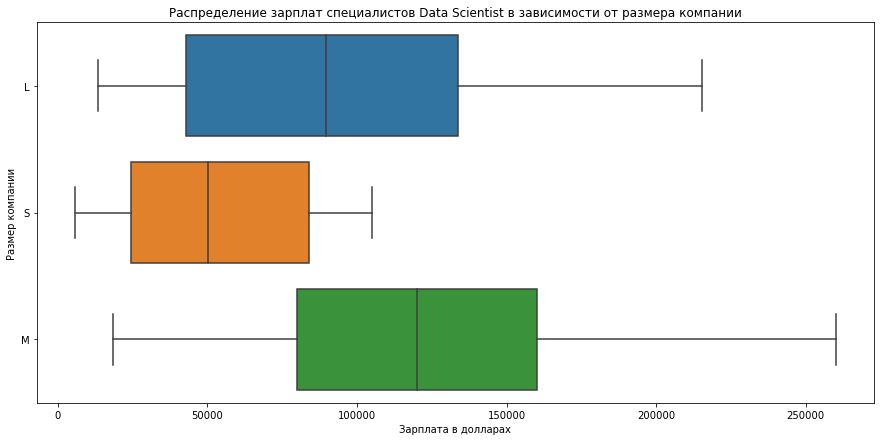

In [57]:
fig = plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=data[data['job_title']=='Data Scientist'],
                x='salary_in_usd',
                y='company_size')
ax.set(xlabel='Зарплата в долларах', ylabel='Размер компании')
plt.title('Распределение зарплат специалистов Data Scientist в зависимости от размера компании')

plt.show()

По графику видно, что самая высокая медианная зарплата в средних компаниях, на втором месте крупные компании, на третьем - небольшие. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

- H0: Зарплаты специалистов Data Scientist в средних компаниях ниже или равны зарплатам в небольших
- H1: Зарплаты специалистов Data Scientist в средних компаниях выше, чем в небольших

In [58]:
data_dss = data_csize[(data_csize['job_title']=='Data Scientist') & (data_csize['company_size']==1)]['salary_in_usd']
data_dsm = data_csize[(data_csize['job_title']=='Data Scientist') & (data_csize['company_size']==2)]['salary_in_usd']
data_dsl = data_csize[(data_csize['job_title']=='Data Scientist') & (data_csize['company_size']==3)]['salary_in_usd']

# Проводим тест Шапиро — Уилка на нормальность распределения
_, p1 = stats.shapiro(data_dss)
_, p2 = stats.shapiro(data_dsm)
_, p3 = stats.shapiro(data_dsl)

print('p-value 1 = %.3f' % (p1))
print('p-value 2 = %.3f' % (p2))
print('p-value 3 = %.3f' % (p3))

# Интерпретируем результат
if p1 <= alpha or p2 <= alpha or p3 <= alpha:
    print('Распределение не нормально')
else:
    print('Распределение нормально')

p-value 1 = 0.242
p-value 2 = 0.666
p-value 3 = 0.030
Распределение не нормально


In [59]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_dsm, data_dss, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


- H0: Зарплаты специалистов Data Scientist в средних компаниях ниже или равны зарплатам в крупных
- H1: Зарплаты специалистов Data Scientist в средних компаниях выше, чем в крупных

In [60]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_dsm, data_dsl, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.009
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


- H0: Зарплаты специалистов Data Scientist в крупных компаниях ниже или равны зарплатам в небольших
- H1: Зарплаты специалистов Data Scientist в крупных компаниях выше, чем в небольших

In [61]:
# Проводим тест Манна-Уитни, поскольку у нас 2 независимые группы, которые не распределены по нормальному закону
_, p = stats.mannwhitneyu(data_dsl, data_dss, alternative='greater')

print('p-value = {:.3f}'.format(p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.004
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод; у нас есть основания утверждать, что зарплаты специалистов Data Scientist в средних компаниях выше, чем в крупных и небольших, а зарплаты в крупных компаниях выше, чем зарплаты в небольших, поскольку результаты тестов оказались статистически значимыми.

## Ворос 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

In [62]:
# Формируем сводную таблицу по количеству должностей Data Scientist и Data Engineer в компаниях разного размера 
table = data[(data['job_title']=='Data Scientist') | 
                (data['job_title']=='Data Engineer')].groupby(['job_title', 'company_size']).size().unstack()
table

company_size,L,M,S
job_title,,,
Data Engineer,34,79,6
Data Scientist,42,65,20


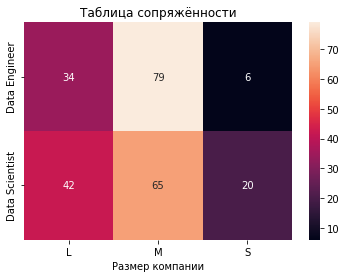

In [63]:
ax = sns.heatmap(table, annot=True)
ax.set(xlabel='Размер компании', ylabel='')
plt.title('Таблица сопряжённости')
plt.show()

- HO: Связи между наличием должностей Data Scientist и Data Engineer и размером компании нет
- H1: Связь между наличием должностей Data Scientist и Data Engineer и размером компании есть

In [64]:
# Проводим тест хи - квадрат
_, p, _, _ = stats.chi2_contingency(table)

print('p-value = %.3f' % (p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.009
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


Вывод: у нас есть основания утверждать, что связь между наличием должностей Data Scientist и Data Engineer и размером компании есть, поскольку результаты теста оказались статистически значимыми.

In [65]:
# Проводим тест Мак - Немара
res = mcnemar(table)

# Извлекаем значение p-value из результатов теста
p = res.pvalue

print('p-value = %.3f' % (p))

# Интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Вывод: у нас нет оснований утверждать, что связь между наличием должностей Data Scientist и Data Engineer и размером компании есть, поскольку результаты теста оказались статистически незначимыми.

## Финальный вывод

По итогам исследования данных HR-агентства удалось выяснить, что большинство факторов датасета влияют на зарплату специалиста Data Scientist, да и вцелом на зарплату всех специалистов. Это и год, в котором была выплачена зарплата; и опыт работы на должности; и роль, в которой соискатель работал в течение года; и валюта выплачиваемой заработной платы; и основная страна проживания сотрудника; и общий объём работы, выполняемой удалённо; и страна главного офиса работодателя или филиала; и среднее количество людей, работавших в компании в течение года. Также удалось выяснить, что наблюдается статистически незначимый ежегодный рост медианной зарплаты у специалистов Data Scientist, в 2021 году статистически незначимый и незначительный, но статистически значимый и значительный в 2022 году; что медианная зарплата Data Scientist статистически незначимо незначительно выше Data Engineer в 2022 году; что зарплаты специалистов Data Scientist в средних компаниях выше, чем в крупных и небольших, а в крупных выше, чем в небольших, а также многое-многое другое!